In [3]:
import nsfg
import thinkstats2
import thinkplot

resp=nsfg.ReadFemResp()

In [4]:
#Question 1
timesmar = resp['timesmar']
jintendn = resp['jintendn']

data1 = timesmar.dropna()
data2 = jintendn.dropna()

print (data1.mean())
print (data2.mean())
print (data1.std())
print (data2.std())


1.387057682985943
2.7052556818181817
4.297113023253083
9.710108051456988


No handles with labels found to put in legend.


NormalPdf(1.387058, 4.297113)


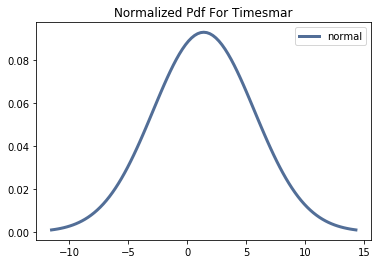

No handles with labels found to put in legend.


NormalPdf(2.705256, 9.710108)


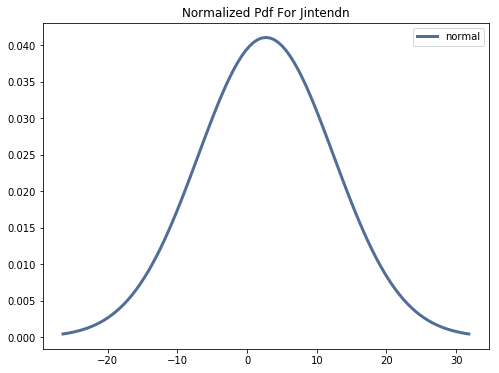

<Figure size 576x432 with 0 Axes>

In [5]:
#Question 2

#for timesmar
mean1= data1.mean()
std1 = data1.std()
pdf1 = thinkstats2.NormalPdf(mean1, std1)
pdf1.Density(mean1 + std1)
print (pdf1)
title1='Normalized Pdf For Timesmar'
thinkplot.Config(title=title1)
thinkplot.Pdf(pdf1, label='normal')
thinkplot.Show()


#for jintendn
mean2= data2.mean()
std2 = data2.std()
pdf2 = thinkstats2.NormalPdf(mean2, std2)
pdf2.Density(mean2 + std2)
print (pdf2)
title2='Normalized Pdf For Jintendn'
thinkplot.Config(title=title2)
thinkplot.Pdf(pdf2, label='normal')
thinkplot.Show()

#Question 3
-As we see, the mean value of the timesmar is approximately 1.5 and the mean of jintendn is like 2.5

In [7]:
#Question 5

from scipy.stats import skew
import math 

#skewness
t=timesmar.skew()
j=jintendn.skew()
print (t)
print (j)

#Pearson Median Skewness
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)
def CentralMoment(xs, k):
    mean = RawMoment(xs, k)
    return sum((x - mean)**k for x in xs) / len(xs)
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)
def PearsonMedianSkewness(xs):
    median = xs.median()
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp
print (PearsonMedianSkewness(data1))
print (PearsonMedianSkewness(data2))


22.227388764710312
9.697247991640873
0.059616468946529104
0.05151419807795444


#Question 6
-Both timesmar's and jintendn's skewnesses are positive. this means that they are skewed right. In their graph, right tail is longer and the mass of distribution is concentrated on the left of the figure.
-Their Pearson's correlation is positive. this means that one value is high and other tends to high. 

No handles with labels found to put in legend.


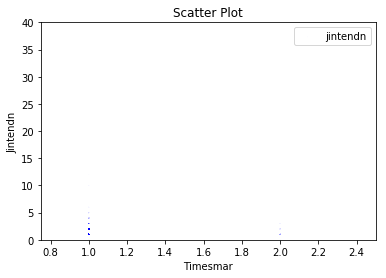

1       1.679908
2       0.440984
5       1.578289
8       0.642133
10     -0.223432
11      0.231531
12      1.347632
13      2.374742
14      0.642276
16      0.549755
17      1.490631
19      1.049998
21      0.457507
22      1.678188
23      1.405722
24      2.084795
27      0.951309
28      0.888499
29      1.417200
30      1.533457
31      0.969323
33     -0.079638
34      1.132680
35      1.925806
36      0.906151
38      1.690078
42      1.433216
43      0.175955
44      0.959752
45      1.685613
          ...   
7583    2.014587
7590    1.763002
7591    1.506878
7593    1.823710
7598    1.088245
7599    3.069575
7601    1.043213
7603    1.254211
7605    0.707086
7606    0.887090
7607    2.937116
7608    1.207312
7609    4.158545
7612    0.971037
7614    1.268435
7616    2.660635
7617    1.429282
7618    1.077077
7619    1.128400
7620    1.084052
7624    1.269047
7629    1.693286
7630    1.334569
7632    1.836009
7633    0.758241
7634    0.189702
7635    1.550980
7636    1.0749

<Figure size 576x432 with 0 Axes>

In [83]:
#Question 7
title3='Scatter Plot'
thinkplot.Config(title=title3, xlim = [0.75, 2.5], ylim = [0, 40])
thinkplot.Scatter(timesmar, jintendn, alpha = 0.01, s= 2)
thinkplot.Show(xlabel='Timesmar', ylabel='Jintendn')

Timesmar = thinkstats2.Jitter(data1)
Jintendn = thinkstats2.Jitter(data2)
print (Timesmar, Jintendn)



202 992
203 73
204 7
205 2


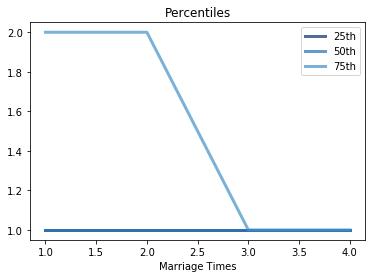

<Figure size 576x432 with 0 Axes>

In [38]:
#Question 8

import numpy as np

all_data = resp.dropna(subset=['timesmar', 'jintendn'])
aranged = np.arange(-200, 200, 1)
indices = np.digitize(all_data.timesmar, aranged)
groups = all_data.groupby(indices)

for i, group in groups:
    print(i, len(group))

times = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]

for percent in [25, 50, 75]:
    jinten = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(times, jinten, label=label)
    title4='Percentiles'
    thinkplot.Config(xlabel='Marriage Times', title=title4)
thinkplot.Show()



#Question 9
-On of the alternatives that shows the relationship between variables is to plot percentiles. Between 1.0 and 2.0, 3.0 and 4.0 the relationship is like linear.  

In [76]:
#Question 10
import pandas

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx = xs.mean()
    varx = xs.var()
    meany =ys.mean()
    vary = ys.var()
    
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    corr = (np.dot(xs-meanx, ys-meany) / len(xs)) / math.sqrt(varx * vary)
    return corr
Corr(timesmar,jintendn)

def SpearmanCorr(xs, ys):
    xranks = pandas.Series(xs).rank()
    yranks = pandas.Series(ys).rank()
    return Corr(xranks, yranks)
SpearmanCorr(timesmar, jintendn)

#2nd way
import scipy
x = np.array(timesmar)
y = np.array(jintendn)

pearson = scipy.stats.pearsonr(x,y)
spearman = scipy.stats.spearmanr(x,y)

print (pearson)
print (spearman)



(nan, 1.0)
SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:5240: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


#Question 12
-As it can be seen in the results above, the mean value of the timesmar is 1.38.... and mean value of the jintendn is 2.70....
-The standard deviations are 4.29 for timesmar and 9.71 for jintendn.
-Their skewness are 22,227.. for timesmar and 9,69... for jintendn. 
-When we compare their Pearson Median Skewness, the timesmar's is 0,059 and jintendn's is 0,0515.
-Additionally, the percentile plot is linear in some ranges.